# Mise en classe

> **Objectifs**
>
> -   Mettre en classe des données



## Lire des données

Comme dans les cours précédents, nous allons travailler sur les cantons suisses [1].

Nous allons commencer par charger ces données depuis un fichier CSV.

Pour rappel, la fonction `read_csv` du module `pandas` permet de lire un fichier CSV
et de le stocker dans un tableau de données. 

Ce tableau contient de nombreuses données. Il est possible de n’afficher
que les premières lignes avec la méthode `head`.

Exécutez le code ci-dessous et prenez connaissance des données :

[1] Source: [OFS - 2019-2020](https://www.bfs.admin.ch/bfs/fr/home/statistiques/statistique-regions/portraits-regionaux-chiffres-cles/cantons.assetdetail.15864478.html)

In [64]:
import pandas as pd

# Lire le fichier stats_cantons.csv et le charger dans 'cantons_data'
cantons_data = pd.read_csv('stats_cantons.csv')

#affiche les 5 1er cantons
cantons_data.head()

,canton,habitants_k,tx_0_19,tx_20_64,tx_65,tx_pop_urbaine,tx_pop_etrangere,superficie_km2,tx_chomage,tx_activite,PIB_hab,tx_aide_sociale,tx_surf_agr_bio,surf_agricole_ha
0,ZH,1539.3,19.8,63.2,17.0,99.3,27.1,1728.9,3.1,82.2,104820,3.1,14.6,22.3
1,BE,1039.5,19.0,59.9,21.1,74.7,16.6,5959.4,2.5,82.4,79115,4.0,13.4,18.7
2,LU,413.1,20.3,61.9,17.8,63.9,18.8,1493.3,2.2,82.9,69256,2.4,10.7,16.8
3,UR,36.7,20.0,59.2,20.8,88.6,12.6,1076.3,1.4,79.7,54291,1.2,15.4,12.4
4,SZ,160.5,19.3,62.6,18.2,82.1,21.9,908.0,1.5,82.1,62040,1.4,12.3,15.4


## Manipuler des données

Pour rappel, on peut également facilement utiliser des colonnes pour créer de nouvelles colonnes.

Par exemple, on peut créer la colonne pour la densité de population au km2 `densite_pop` qui correspond au nombre d'habitants sur la superficie.

In [65]:
# création de la colonne contenant la densité
# attention ! la popuplation est donnée en milliers d'habitants !
cantons_data["densite_pop"] = (cantons_data["habitants_k"] *1000) / cantons_data["superficie_km2"]

# on n'affiche que les colonnes 'canton' et 'densite_pop'
cantons_data[["canton" ,"densite_pop"]].head(10)

,canton,densite_pop
0,ZH,890.334895
1,BE,174.430312
2,LU,276.635639
3,UR,34.098300
4,SZ,176.762115
5,OW,77.252344
6,NW,156.216020
7,GL,59.235483
8,ZG,534.562212
9,FR,192.533206


On l'a déjà vu, si on s’intéresse à un canton en particulier, on peut également filtrer les données pour ne garder que la lignes correspondant à ce canton.

On peut également stocker le résultat du filtre dans une nouvelle variable !

Par exemple, pour Neuchâtel, on peut créer un nouveau tableau `neuch_data` qui ne contient que les lignes où la colonne `canton` vaut `NE`.

In [66]:
neuch_data = cantons_data[cantons_data["canton"] == "NE"]

neuch_data.head()

,canton,habitants_k,tx_0_19,tx_20_64,tx_65,tx_pop_urbaine,tx_pop_etrangere,superficie_km2,tx_chomage,tx_activite,PIB_hab,tx_aide_sociale,tx_surf_agr_bio,surf_agricole_ha,densite_pop
23,NE,176.5,21.0,59.8,19.3,87.8,25.3,802.3,4.6,76.2,93277,7.0,9.7,40.5,219.992522


## Mettre en classe

Le module pandas permet de facilement mettre en classe des données numériques :

### amplitude fixe - cut()

amplitude fixe = (val max - val min)

La méthode `cut` permet de créer des classes – selon la méthode de l’amplitude fixe ou des seuils observés – à partir d’une
variable numérique. 

L’argument `bins` (bins = bacs en anglais) peut soit être un chiffre qui indique le nombre de classes, soit une liste qui indique les bornes des
classes. 

Le résultat devra être conservé dans une nouvelle colonne !



In [67]:
# on crée une colonne contenant les 4 "bacs" 
cantons_data["densite_4_cats"] = pd.cut(cantons_data["densite_pop"], bins=4, labels=["faible", "moyenne", "élevée", "très élevée"])

# on affiche tout
print(cantons_data[["canton" ,"densite_pop", "densite_4_cats"]])

   canton  densite_pop densite_4_cats
0      ZH   890.334895         faible
1      BE   174.430312         faible
2      LU   276.635639         faible
3      UR    34.098300         faible
4      SZ   176.762115         faible
5      OW    77.252344         faible
6      NW   156.216020         faible
7      GL    59.235483         faible
8      ZG   534.562212         faible
9      FR   192.533206         faible
10     SO   348.178138         faible
11     BS  5291.891892    très élevée
12     BL   559.204172         faible
13     SH   275.804290         faible
14     AR   228.077398         faible
15     AI    93.387471         faible
16     SG   251.489634         faible
17     GR    28.008445         faible
18     AG   488.461538         faible
19     TG   281.896117         faible
20     TI   124.986666         faible
21     VD   250.638192         faible
22     VS    66.126933         faible
23     NE   219.992522         faible
24     GE  1785.688983        moyenne
25     JU   

On peut aussi définir nous-même les seuils :

In [68]:
# seuils définis manuellement 
cantons_data["densite_4_cats"] = pd.cut(cantons_data["densite_pop"], bins=[0,100,300,1000,5000,50000])

# on affiche tout
print(cantons_data[["canton" ,"densite_pop", "densite_4_cats"]])

   canton  densite_pop densite_4_cats
0      ZH   890.334895    (300, 1000]
1      BE   174.430312     (100, 300]
2      LU   276.635639     (100, 300]
3      UR    34.098300       (0, 100]
4      SZ   176.762115     (100, 300]
5      OW    77.252344       (0, 100]
6      NW   156.216020     (100, 300]
7      GL    59.235483       (0, 100]
8      ZG   534.562212    (300, 1000]
9      FR   192.533206     (100, 300]
10     SO   348.178138    (300, 1000]
11     BS  5291.891892  (5000, 50000]
12     BL   559.204172    (300, 1000]
13     SH   275.804290     (100, 300]
14     AR   228.077398     (100, 300]
15     AI    93.387471       (0, 100]
16     SG   251.489634     (100, 300]
17     GR    28.008445       (0, 100]
18     AG   488.461538    (300, 1000]
19     TG   281.896117     (100, 300]
20     TI   124.986666     (100, 300]
21     VD   250.638192     (100, 300]
22     VS    66.126933       (0, 100]
23     NE   219.992522     (100, 300]
24     GE  1785.688983   (1000, 5000]
25     JU   

### effectifs fixes - qcut()

effectifs fixes = nb de val / nb de classe

La méthode `qcut` permet de créer des classe – selon la méthode des effectifs fixes – à partir d’une variable numérique en précisant le
nombre de classes. 

L’argument `q` permet de préciser le nombre de classes.


In [69]:
# on découpe les données en 4 quantiles
cantons_data["densite_q"] = pd.qcut(cantons_data["densite_pop"], 4, labels=["faible", "moyenne", "élevée", "très élevée"])

# on affiche tout
print(cantons_data[["canton" ,"densite_pop", "densite_q"]])

   canton  densite_pop    densite_q
0      ZH   890.334895  très élevée
1      BE   174.430312      moyenne
2      LU   276.635639       élevée
3      UR    34.098300       faible
4      SZ   176.762115      moyenne
5      OW    77.252344       faible
6      NW   156.216020      moyenne
7      GL    59.235483       faible
8      ZG   534.562212  très élevée
9      FR   192.533206      moyenne
10     SO   348.178138  très élevée
11     BS  5291.891892  très élevée
12     BL   559.204172  très élevée
13     SH   275.804290       élevée
14     AR   228.077398       élevée
15     AI    93.387471       faible
16     SG   251.489634       élevée
17     GR    28.008445       faible
18     AG   488.461538  très élevée
19     TG   281.896117       élevée
20     TI   124.986666      moyenne
21     VD   250.638192       élevée
22     VS    66.126933       faible
23     NE   219.992522      moyenne
24     GE  1785.688983  très élevée
25     JU    87.765323       faible


L’argument `labels` permet de préciser les étiquettes des classes :

In [70]:
cantons_data["densite_4_cats"] = pd.cut(cantons_data["densite_pop"], bins=4, labels=["faible", "moyenne", "élevée", "très élevée"])
print(cantons_data[["canton" ,"densite_pop", "densite_4_cats"]])

   canton  densite_pop densite_4_cats
0      ZH   890.334895         faible
1      BE   174.430312         faible
2      LU   276.635639         faible
3      UR    34.098300         faible
4      SZ   176.762115         faible
5      OW    77.252344         faible
6      NW   156.216020         faible
7      GL    59.235483         faible
8      ZG   534.562212         faible
9      FR   192.533206         faible
10     SO   348.178138         faible
11     BS  5291.891892    très élevée
12     BL   559.204172         faible
13     SH   275.804290         faible
14     AR   228.077398         faible
15     AI    93.387471         faible
16     SG   251.489634         faible
17     GR    28.008445         faible
18     AG   488.461538         faible
19     TG   281.896117         faible
20     TI   124.986666         faible
21     VD   250.638192         faible
22     VS    66.126933         faible
23     NE   219.992522         faible
24     GE  1785.688983        moyenne
25     JU   

In [71]:
cantons_data["densite_q"] = pd.qcut(cantons_data["densite_pop"], 4, labels=["faible", "moyenne", "élevée", "très élevée"])
print(cantons_data[["canton" ,"densite_pop", "densite_q"]])

   canton  densite_pop    densite_q
0      ZH   890.334895  très élevée
1      BE   174.430312      moyenne
2      LU   276.635639       élevée
3      UR    34.098300       faible
4      SZ   176.762115      moyenne
5      OW    77.252344       faible
6      NW   156.216020      moyenne
7      GL    59.235483       faible
8      ZG   534.562212  très élevée
9      FR   192.533206      moyenne
10     SO   348.178138  très élevée
11     BS  5291.891892  très élevée
12     BL   559.204172  très élevée
13     SH   275.804290       élevée
14     AR   228.077398       élevée
15     AI    93.387471       faible
16     SG   251.489634       élevée
17     GR    28.008445       faible
18     AG   488.461538  très élevée
19     TG   281.896117       élevée
20     TI   124.986666      moyenne
21     VD   250.638192       élevée
22     VS    66.126933       faible
23     NE   219.992522      moyenne
24     GE  1785.688983  très élevée
25     JU    87.765323       faible


> **Exercice 1**
>
> -   À partir du tableau `cantons_data`, créez des classes à partir des colonnes suivantes :
>     -   tx_chomage 
>     -   PIB_hab 
>     -   PIB (colonne à créer !)
> - Faites une mise en classe par quartiles (faible, moyen, élevé, très élevé) pour chacune de ces classes.
> -   Affichez le tableau final


> **Exercice 2**
>
> -   Jouez avec le code ci-dessous pour afficher les différentes classes créées en 1


<Axes: >

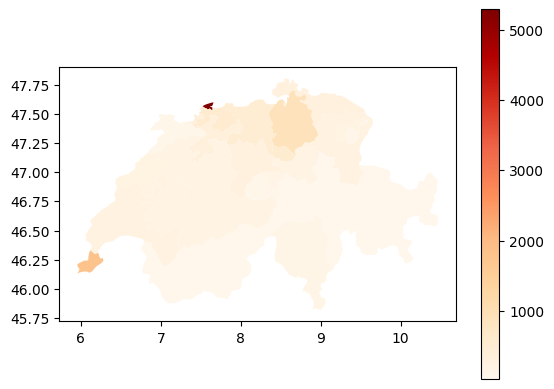

In [72]:
# charge la bibliothèque permettant de faire des cartes
import geopandas

# on crée une colonne contenant les clés pour faire une jointure avec la carte
cantons_data["CodeCH"] = "CH" + cantons_data["canton"]

# chargement de la carte
carte_suisse = geopandas.read_file("ch.shp")

# jointure carte / données
carte_suisse_pop = carte_suisse.merge(
    cantons_data, how="left", left_on="id", right_on="CodeCH"
)

# affichage
carte_suisse_pop.plot(
    column="densite_pop",
    legend=True,
    cmap="OrRd",
    missing_kwds={"color": "grey", "label": "No Data"}
)